In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\venka\OneDrive\Documents\AIDS_TekWorks\Mall_customers.csv')

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
x=df.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

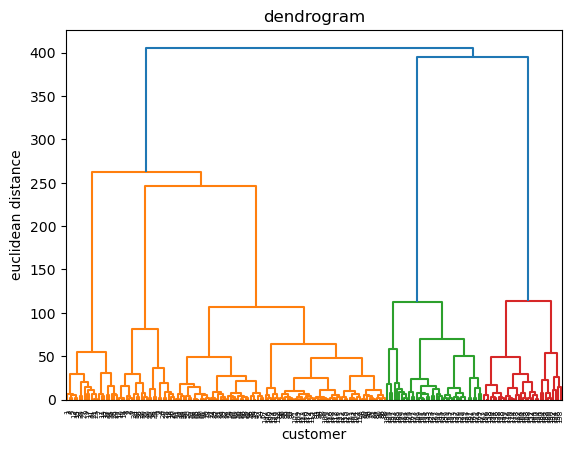

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("dendrogram")
plt.xlabel("customer")
plt.ylabel("euclidean distance")
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [21]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

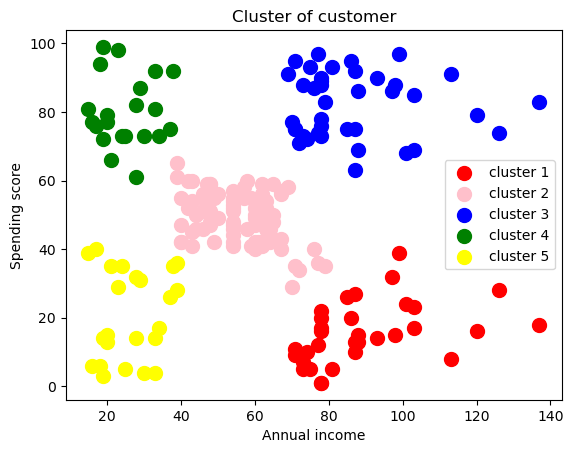

In [29]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='pink',label='cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='blue',label='cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='green',label='cluster 4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='yellow',label='cluster 5')
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.title("Cluster of customer")
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,y_hc)
print("Silhouette score for Hierarchical clustering",score)

Silhouette score for Hierarchical clustering 0.5529945955148897


In [57]:
df1=pd.read_csv(r'C:\Users\venka\OneDrive\Documents\AIDS_TekWorks\11-02-2026\all_data.csv',encoding='latin1',header=None)

In [59]:
df1.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [85]:
df1.columns=['Sentiment','News']
newsdf=df1['News']
newsdf = newsdf.to_frame()

newsdf

,News
0,"According to Gran , the company has no plans t..."
1,Technopolis plans to develop in stages an area...
2,The international electronic industry company ...
3,With the new production plant the company woul...
4,According to the company 's updated strategy f...
...,...
4841,LONDON MarketWatch -- Share prices ended lower...
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,Operating profit fell to EUR 35.4 mn from EUR ...
4844,Net sales of the Paper segment decreased to EU...


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer



vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=1000
)

X_tfidf = vectorizer.fit_transform(newsdf['News'])
print("TF-IDF matrix shape:", X_tfidf.shape)

TF-IDF matrix shape: (4846, 1000)


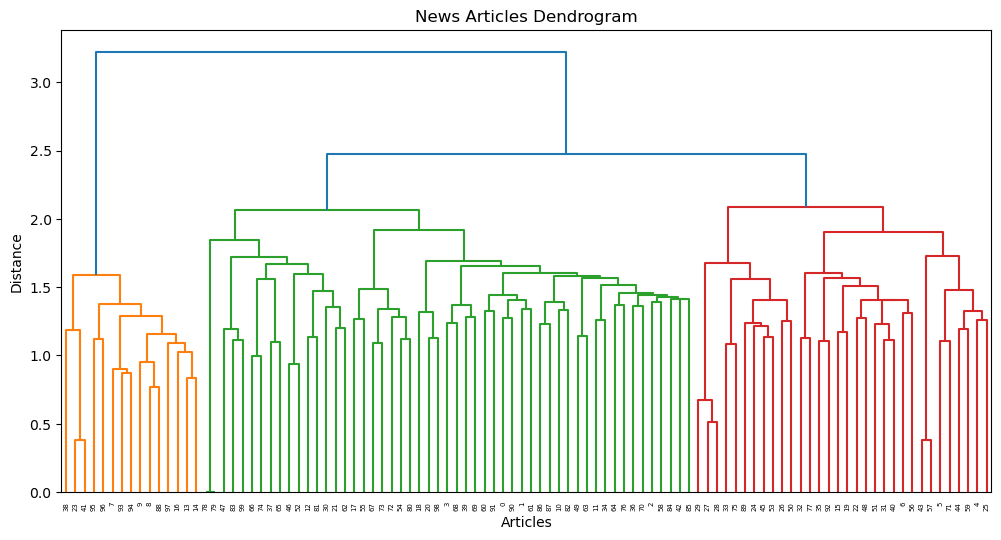

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

subset = X_tfidf[:100].toarray()

Z = linkage(subset, method='ward')

plt.figure(figsize=(12, 6))

dendrogram(Z)

# 👉 Put AFTER dendrogram and BEFORE show()
plt.axhline(y=10, color='r', linestyle='--')

plt.title("News Articles Dendrogram")
plt.xlabel("Articles")
plt.ylabel("Distance")
plt.show()


In [105]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(
    n_clusters=5,        # choose from dendrogram
    linkage='ward'
)

clusters = model.fit_predict(X_tfidf.toarray())

newsdf['Cluster'] = clusters
print(newsdf.head())


                                                News  Cluster
0  According to Gran , the company has no plans t...        1
1  Technopolis plans to develop in stages an area...        1
2  The international electronic industry company ...        1
3  With the new production plant the company woul...        0
4  According to the company 's updated strategy f...        1


In [106]:
for i in range(5):
    print(f"\n--- Cluster {i} ---")
    print(newsdf[newsdf['Cluster']==i]['News'].head(5))



--- Cluster 0 ---
3     With the new production plant the company woul...
15    Consolidated net sales increased 16 % to reach...
19    Its board of directors will propose a dividend...
20    Lifetree was founded in 2000 , and its revenue...
24    Net sales increased to EUR193 .3 m from EUR179...
Name: News, dtype: object

--- Cluster 1 ---
0    According to Gran , the company has no plans t...
1    Technopolis plans to develop in stages an area...
2    The international electronic industry company ...
4    According to the company 's updated strategy f...
5    FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
Name: News, dtype: object

--- Cluster 2 ---
49     The company 's order book stood at 1.5 bln eur...
63     At first the contract envisaged the constructi...
193    Finnish department store chain Stockmann Oyj A...
194    Finnish lifting equipment maker Konecranes Oyj...
196    Finnish metal industry solutions supplier Outo...
Name: News, dtype: object

--- Cluster 3 ---
6     

In [107]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_tfidf, clusters)

print("Silhouette Score:", score)


Silhouette Score: 0.007537354738986159
